In [ ]:
Name: Omkar Hulawale
Batch: TE-A3
Roll_No: 13165

Enter the number of queens (n):  4



Backtracking Solutions (Step by Step):


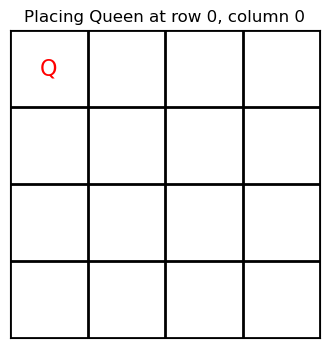

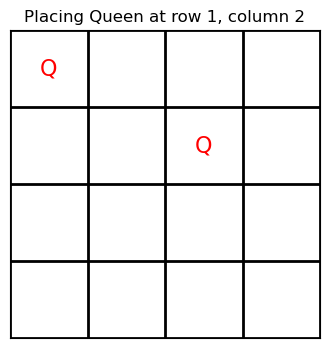

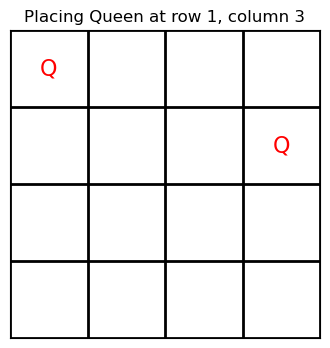

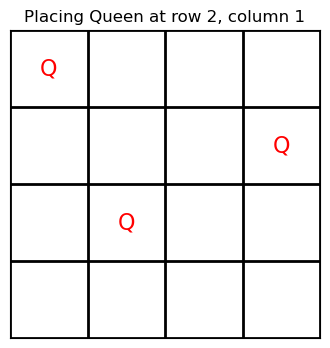

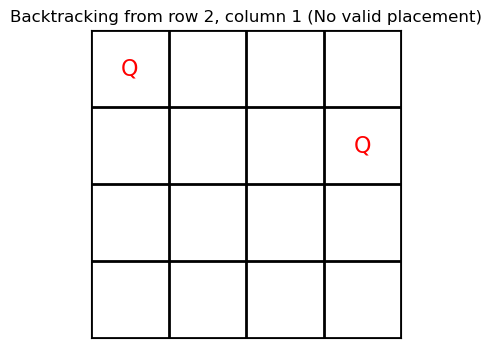

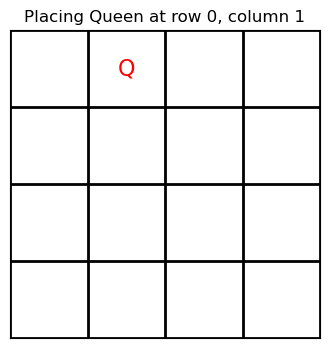

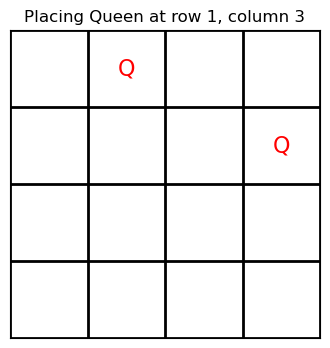

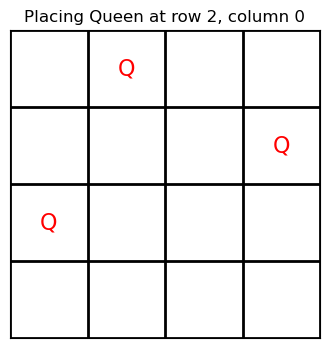

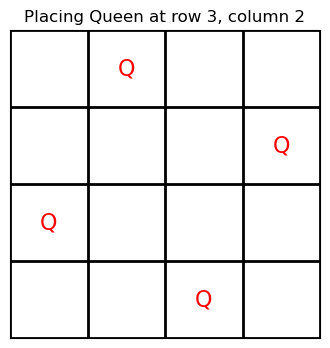

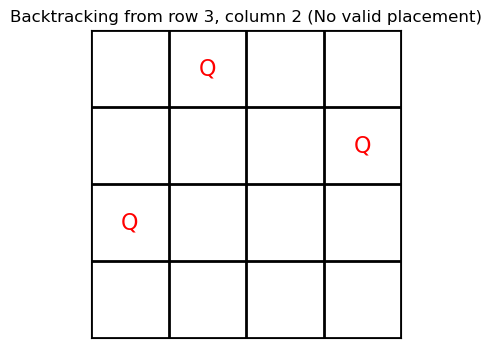

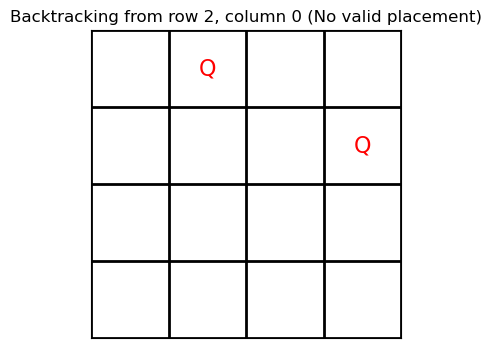

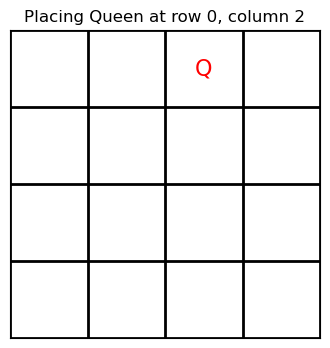

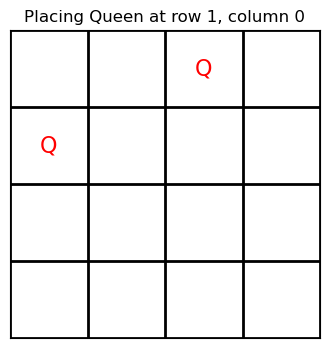

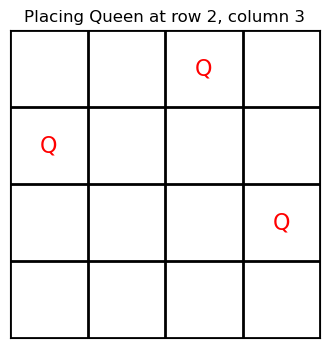

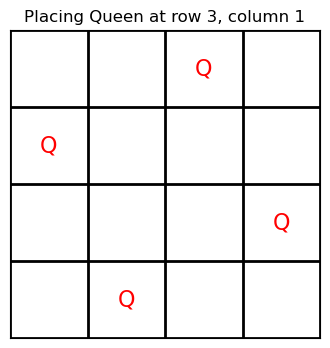

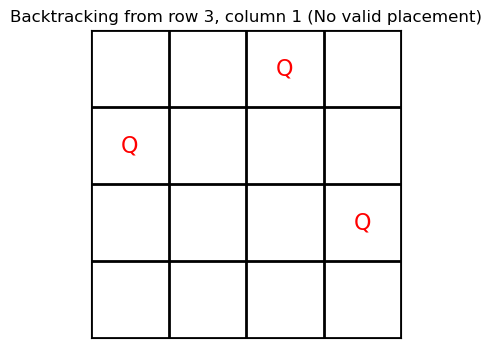

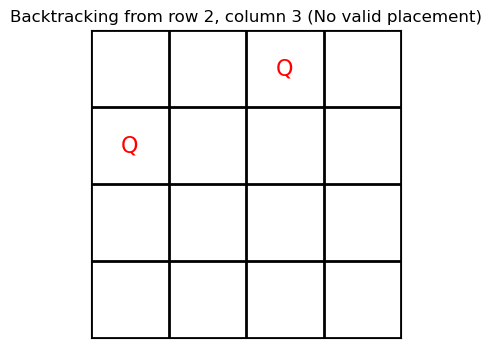

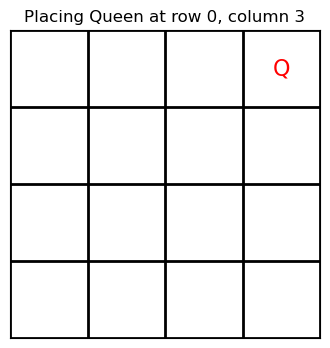

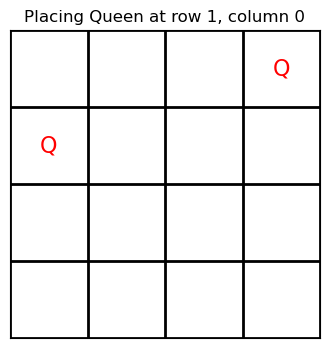

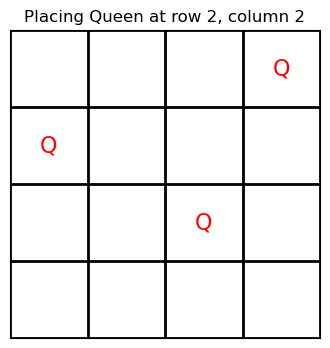

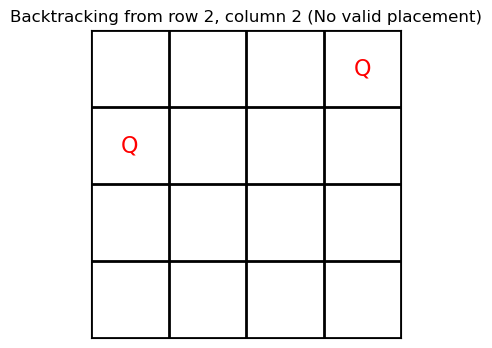

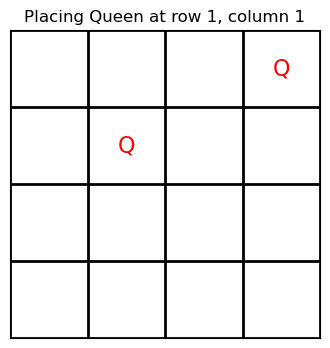


Branch and Bound Solutions (Step by Step):


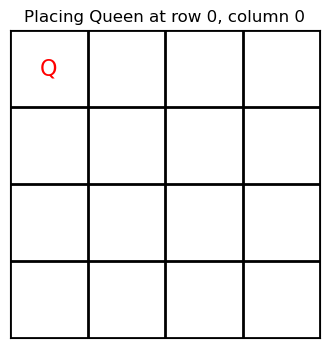

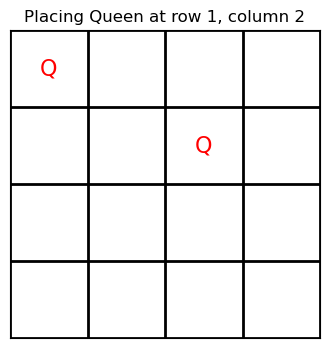

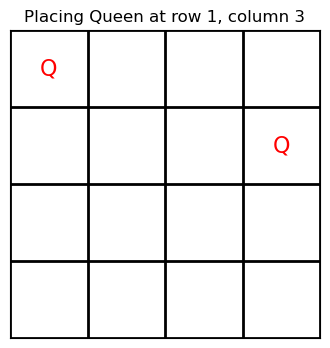

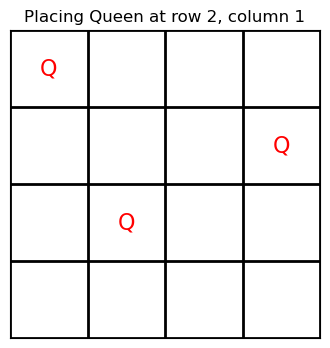

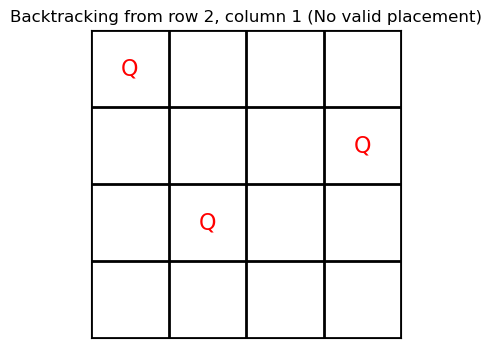

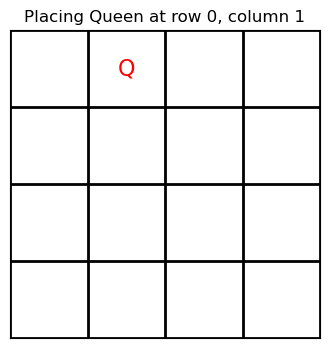

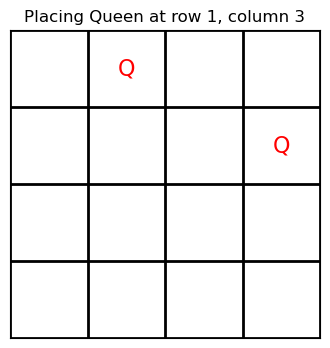

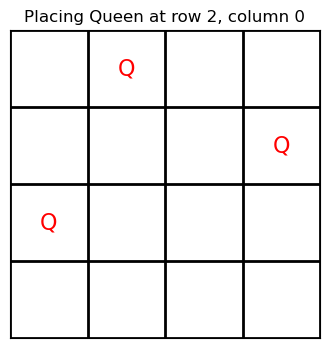

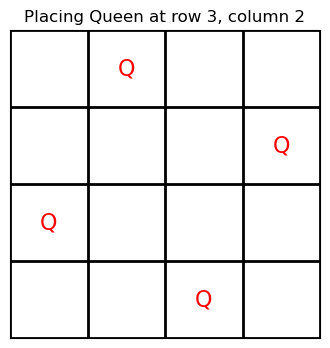

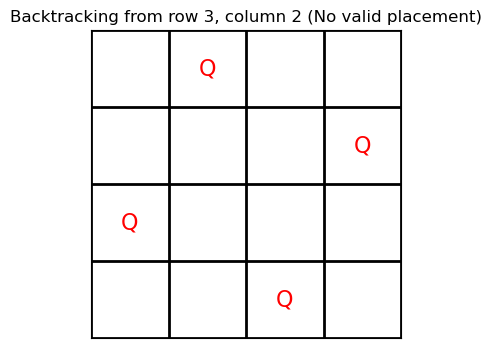

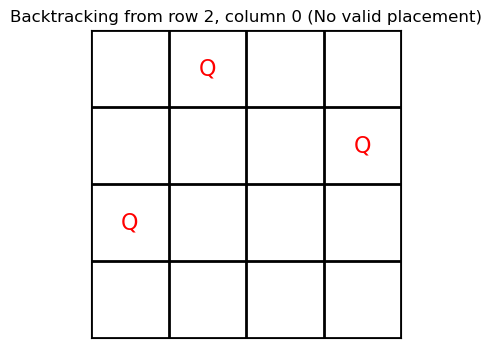

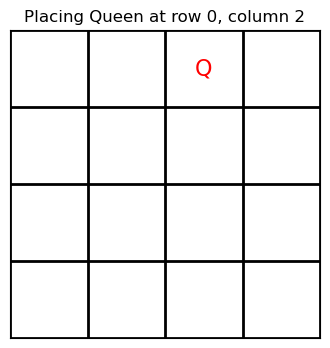

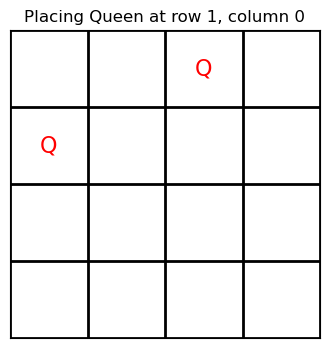

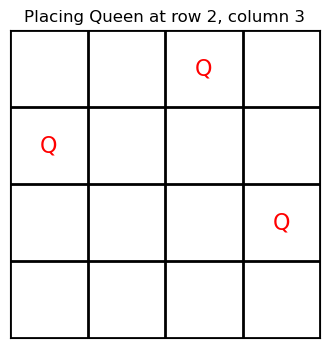

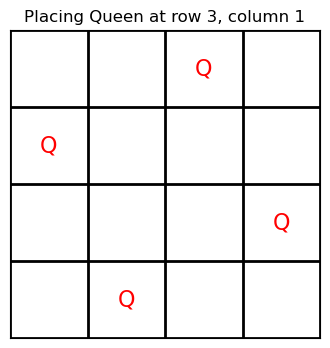

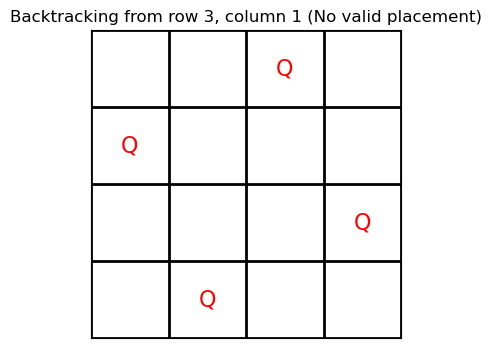

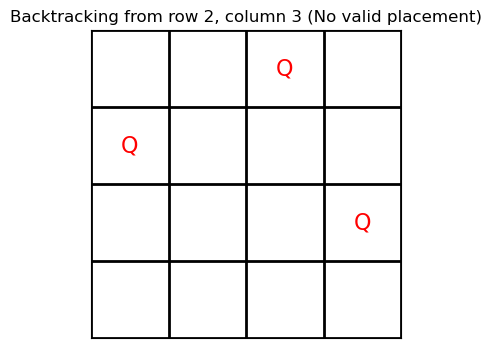

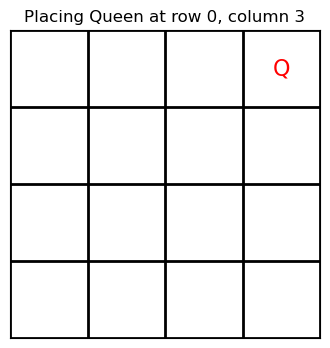

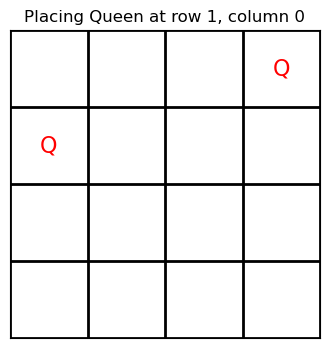

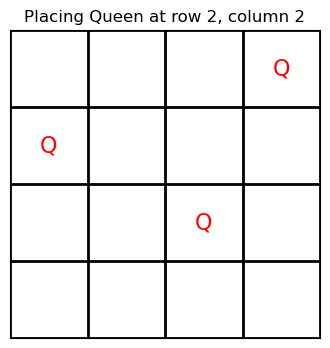

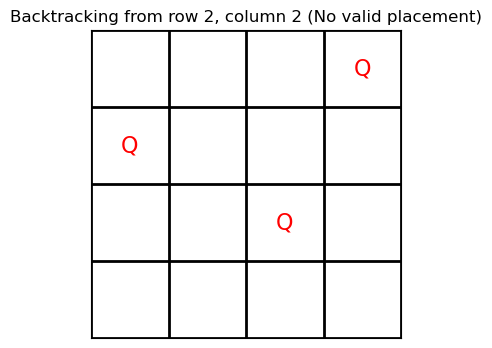

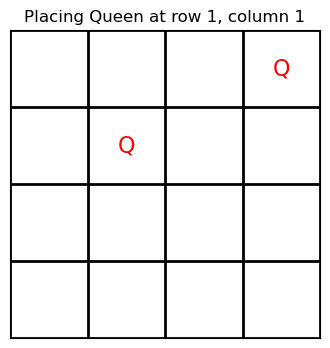


Both algorithms produced the same solution: [1, 3, 0, 2]


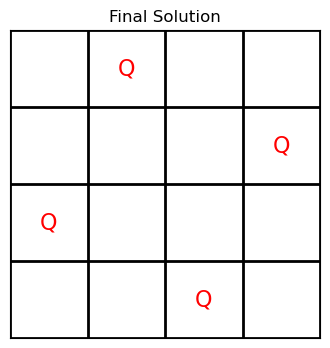

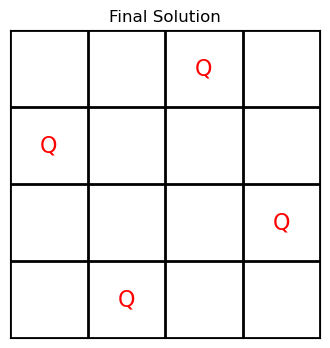

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_board(board, n, message):
    """ Visualize the board using matplotlib with proper alignment """
    fig, ax = plt.subplots(figsize=(n, n))
    ax.set_xticks(np.arange(n+1)-0.5, minor=True)
    ax.set_yticks(np.arange(n+1)-0.5, minor=True)
    ax.grid(which="minor", color="black", linestyle='-', linewidth=2)
    ax.tick_params(which="both", size=0)

    # Draw queens
    for row in range(n):
        col = board[row]
        if col != -1:
            ax.text(col, row, 'Q', ha='center', va='center', fontsize=16, color='red')

    ax.set_xticks([])
    ax.set_yticks([])
    plt.gca().invert_yaxis()
    plt.title(message)
    plt.show()

def is_safe(board, row, col, n):
    """ Check if a queen can be placed at (row, col) without conflicts """
    for i in range(row):
        if board[i] == col or abs(board[i] - col) == row - i:
            return False
    return True

def solve_nqueens_backtracking(board, row, n, solutions):
    """ Solve N-Queens using Backtracking """
    if row == n:
        solutions.append(board[:])
        return

    for col in range(n):
        if is_safe(board, row, col, n):
            board[row] = col
            visualize_board(board, n, f"Placing Queen at row {row}, column {col}")
            solve_nqueens_backtracking(board, row + 1, n, solutions)
            board[row] = -1  # Backtrack if the 3rd or 4th queen can't be placed
            if row >= 2:
                visualize_board(board, n, f"Backtracking from row {row}, column {col} (No valid placement)")

def nqueens_backtracking(n):
    """ Initialize the backtracking process """
    board = [-1] * n
    solutions = []
    solve_nqueens_backtracking(board, 0, n, solutions)
    return solutions

class NQueensBranchBound:
    """ Solve N-Queens using Branch and Bound """
    def __init__(self, n):
        self.n = n
        self.board = [-1] * n
        self.solutions = []

    def is_safe(self, row, col):
        for i in range(row):
            if self.board[i] == col or abs(self.board[i] - col) == row - i:
                return False
        return True

    def solve(self, row):
        if row == self.n:
            self.solutions.append(self.board[:])
            return

        for col in range(self.n):
            if self.is_safe(row, col):
                self.board[row] = col
                visualize_board(self.board, self.n, f"Placing Queen at row {row}, column {col}")
                self.solve(row + 1)
                if row >= 2:
                    visualize_board(self.board, self.n, f"Backtracking from row {row}, column {col} (No valid placement)")
                self.board[row] = -1  # Backtrack

    def solve_nqueens(self):
        self.solve(0)
        return self.solutions

def print_solutions(solutions):
    """ Print all solutions visually """
    for sol in solutions:
        visualize_board(sol, len(sol), "Final Solution")

def main():
    """ Main execution function """
    n = int(input("Enter the number of queens (n): "))

    # Backtracking solution
    print("\nBacktracking Solutions (Step by Step):")
    solutions_backtracking = nqueens_backtracking(n)
    
    # Branch and Bound solution
    print("\nBranch and Bound Solutions (Step by Step):")
    solver = NQueensBranchBound(n)
    solutions_branch_bound = solver.solve_nqueens()

    # Ensure only one solution is shown
    if solutions_backtracking == solutions_branch_bound and solutions_backtracking:
        print(f"\nBoth algorithms produced the same solution: {solutions_backtracking[0]}")
        print_solutions(solutions_backtracking)
    elif solutions_backtracking:
        print(f"\nBacktracking solution found: {solutions_backtracking[0]}")
        print_solutions(solutions_backtracking)
    elif solutions_branch_bound:
        print(f"\nBranch and Bound solution found: {solutions_branch_bound[0]}")
        print_solutions(solutions_branch_bound)
    else:
        print("\nNo solution found using either algorithm.")

if __name__ == "__main__":
    main()
